In [9]:
from silico_color_mixer import SilicoColorMixer
from plot_pie_charts import make_piechart_plot
import numpy as np
from IPython import display
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [10]:
# TEACHER
def root_sum_sqr_err(input1, input2):
    """The sum of squared difference between input colors"""
    dif = np.asarray(input1)- np.asarray(input2)
    return (sum(dif**2)**(0.5))

# root_sum_sqr_err(color, target)

In [11]:
target0 = (220, 141, 50)
mixer_opt2 = SilicoColorMixer(noise={'colors': 2, 'volume': 0.02, 'measurement': 2}, target=target0)

In [12]:
# TEACHER
func_calls = [0]

def find_color(color_list, func_calls=func_calls):
    color, target = mixer_opt2.run_cuvette(color_list, read_target=True)
    score = root_sum_sqr_err(color, target)
    #print('color:', color, 'target:', target, 'input:', color_list, 'score:', score)      # NOTICE THIS
    print(color_list)
    print(score)
    data_opt1.append(color)
    data_pie0.append([score, list(color_list)])
    make_piechart_plot(data_pie0)
    plt.axis('off')
    plt.imshow(np.array([data_opt1], dtype=np.uint8))
    plt.show()
    
    input('Press Enter for next point')
    display.clear_output(wait=True) 

    return score

[0.46538774 0.46538774 0.17820409 0.17820409]
72.2564875980005


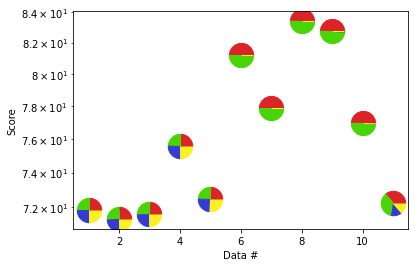

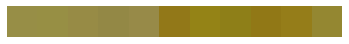

KeyboardInterrupt: Interrupted by user

In [13]:
func_calls = [0]
data_opt1 = []
data_pie0 = []
x0 = [0.25, 0.25, 0.25, 0.25]

res = minimize(find_color, x0, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.01, 'maxiter': 4, 'gtol': 0.1, 'maxfun':60})
res

[0.86121289 0.03994933 0.08690411 0.85577731]
9.273618495495704


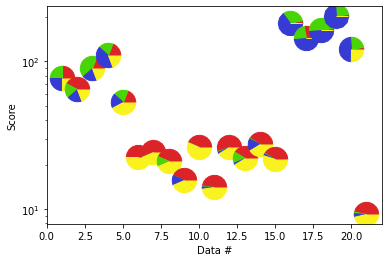

KeyboardInterrupt: Interrupted by user

In [14]:
func_calls = [0]
data_opt1 = []
data_pie0 = []
x0 = [0.25, 0.25, 0.25, 0.25]




res = minimize(find_color, x0, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.3, 'maxiter': 4, 'gtol': 0.1, 'maxfun':60})
res

[0.873022   0.         0.11596677 0.86492765]
6.082762530298219


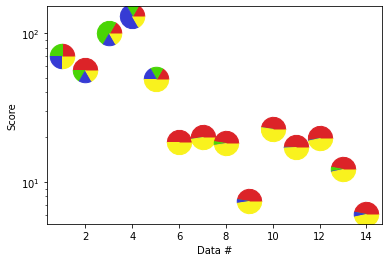

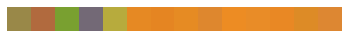

In [ ]:
func_calls = [0]
data_opt1 = []
data_pie0 = []
x0 = [0.05, 0.05, 0.05, 0.05]

res = minimize(find_color, x0, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.1, 'maxiter': 4, 'gtol': 0.1, 'maxfun':60})
res

Note, you might want to use a different value of `x`, i.e. the recipe for mixing the target color, than the one resulting from the optimization. If you have saved scores and color_list data, like the type you have used to make the pie charts, you can search through that for the lowest possible score and take that as your result.

# TRASH  BELOW

In [ ]:
# Teacher
idx = np.asarray(data_pie)[:,0].argmin()
print(data_pie[idx])

You should see something like this:

Let us just see which colors were found compared to the taget color. First we plot the target color and then all other colors that have been mixed during the optimization.

In [ ]:
plt.axis('off')
#plt.imshow(np.array([[target0]], dtype=np.uint8))
display.display(plt.imshow(np.array([[target0]], dtype=np.uint8)))
plt.show()
data_opt_vis = data_opt1 + [(255., 255., 255.)] * (10 - len(data_opt1) % 10)
plt.axis('off')
data_array = np.asarray(data_opt_vis).reshape(int(len(data_opt_vis)/10), 10, 3)
plt.imshow(np.asarray(data_array, dtype=np.uint8))

In [ ]:
data_opt_vis = data_opt1 + [(255., 255., 255.)] * (10 - len(data_opt1) % 10)
plt.axis('off')
data_array = np.asarray(data_opt_vis).reshape(int(len(data_opt_vis)/10), 10, 3)
plt.imshow(np.asarray(data_array, dtype=np.uint8))

The first issue is the noise. Lets turn that of completely.

In [ ]:
mixer_opt1 = SilicoColorMixer(target=target0, noise=False)

The second is that the function we are trying to optimize does not actually have a minimum. `[1,1,1,1] = [0.1, 0.1, 0.1, 0.1]`. The score only depends on the ratio of the inputs and not their numerical value. Some optimizers can accept linear constraints, which would help us, but since that it not generally the case we will instead use a "filter function" that generates a minimum in our function when we multiply the score with the filter value.

We first use a normal distribution as the filter function.

In [ ]:
def filter_func(color_list):
    #limit_below = np.any(np.asarray(color_list) <= 0.0)
    #print(limit_below)
    #if limit_below:
    #    return 200
    col_sum = sum(color_list)
    std = 2
    mean = 1
    norm_dist = 1./(std*(2.*np.pi)**0.5)*np.exp(-1./2.*((col_sum-mean)/std)**2)
    return (100-1002*norm_dist/2)

x=np.arange(0,3,0.05)
plt.plot(x,filter_func([x]))
filter_func([1.,0.,0.,0.])

Find another function that could serve as filter.

The new function to minimize is the product of the previous and the filter function.

In [ ]:
def find_color_min(color_list):
    #print(color_list, (find_color(color_list)+1) * filter_func(color_list))
    return ((find_color(color_list) + 1) * filter_func(color_list))

In [ ]:
x0 = x0/sum(x0)
# x0 = [0.26483819,  0.75270829,  0.96769502, -0.65597114]
x0 = [0.25, 0.25, 0.25, 0.25]

In [ ]:
data_opt1 = []
res = minimize(find_color, x0, method='CG' , options={'disp': True, 'maxiter':3, 'eps':0.1})# 'gtol': 100, 'eps':0.001})
print(res.x)

In [ ]:
data_opt_vis = data_opt1 + [(255., 255., 255.)] * (10 - len(data_opt1) % 10)
plt.axis('off')
data_array = np.asarray(data_opt_vis).reshape(int(len(data_opt_vis)/10), 10, 3)
plt.imshow(np.asarray(data_array, dtype=np.uint8))

In [ ]:
import time
from IPython import display

for maxi in range(10):
    display.clear_output(wait=True)
    data_opt1 = []
    res = minimize(find_color, x0, method='CG', options={'disp': True, 'maxiter': maxi+1,'eps': 0.1})# 'gtol': 100, 'eps':0.001})
    print(res.x)
    data_opt_vis = data_opt1 + [(255., 255., 255.)] * (10 - len(data_opt1) % 10)
    plt.axis('off')
    data_array = np.asarray(data_opt_vis).reshape(int(len(data_opt_vis)/10), 10, 3)
    #plt.imshow(np.asarray(data_array, dtype=np.uint8))
    
    display.display(plt.imshow(np.asarray(data_array, dtype=np.uint8)))
    plt.show()
    time.sleep(3)

In [ ]:
try:
    from noisyopt import minimizeCompass
except:
    !pip3 install noisyopt --user --upgrade
    from noisyopt import minimizeCompass

In [ ]:
bounds = 4*[[0.0, 1.0]]

In [ ]:
print(bounds)

In [ ]:
data_opt1 = []
res = minimizeCompass(find_color, bounds=bounds, x0=x0, deltatol=0.1, paired=False, feps=0.1, eps=0.2, disp=True)
#res = minimizeCompass(find_color, x0=x0, deltatol=0.1, paired=False, feps=1, disp=True)

In [ ]:
print(res)

In [ ]:
data_opt_vis = data_opt1 + [(255., 255., 255.)] * (10 - len(data_opt1) % 10)
plt.axis('off')
data_array = np.asarray(data_opt_vis).reshape(int(len(data_opt_vis)/10), 10, 3)
plt.imshow(np.asarray(data_array, dtype=np.uint8))

We thus have to keep our ultimate usecase in mind, i.e., running the LEGO robot, when deciding on an optimizer. The LEGO will have to reset or break after every 9 function evalutions due to having filled all mixing cuvettes and each function evaluation takes minuttes. We thus want an optimizer that uses only few function evaluations.

